In [3]:
import networkx as nx
import time
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import operator
%matplotlib inline


## Our Model ##
---
Before going into the analysis, we will describe our network visually. Our network will consist of a massive set
of egonets. In our case, our egonets will consist a focal node which is the user we are representing. Its alter nodes
will be the artists that user is listening to. The weight of each edge represents how many times the user listened
to that artist.

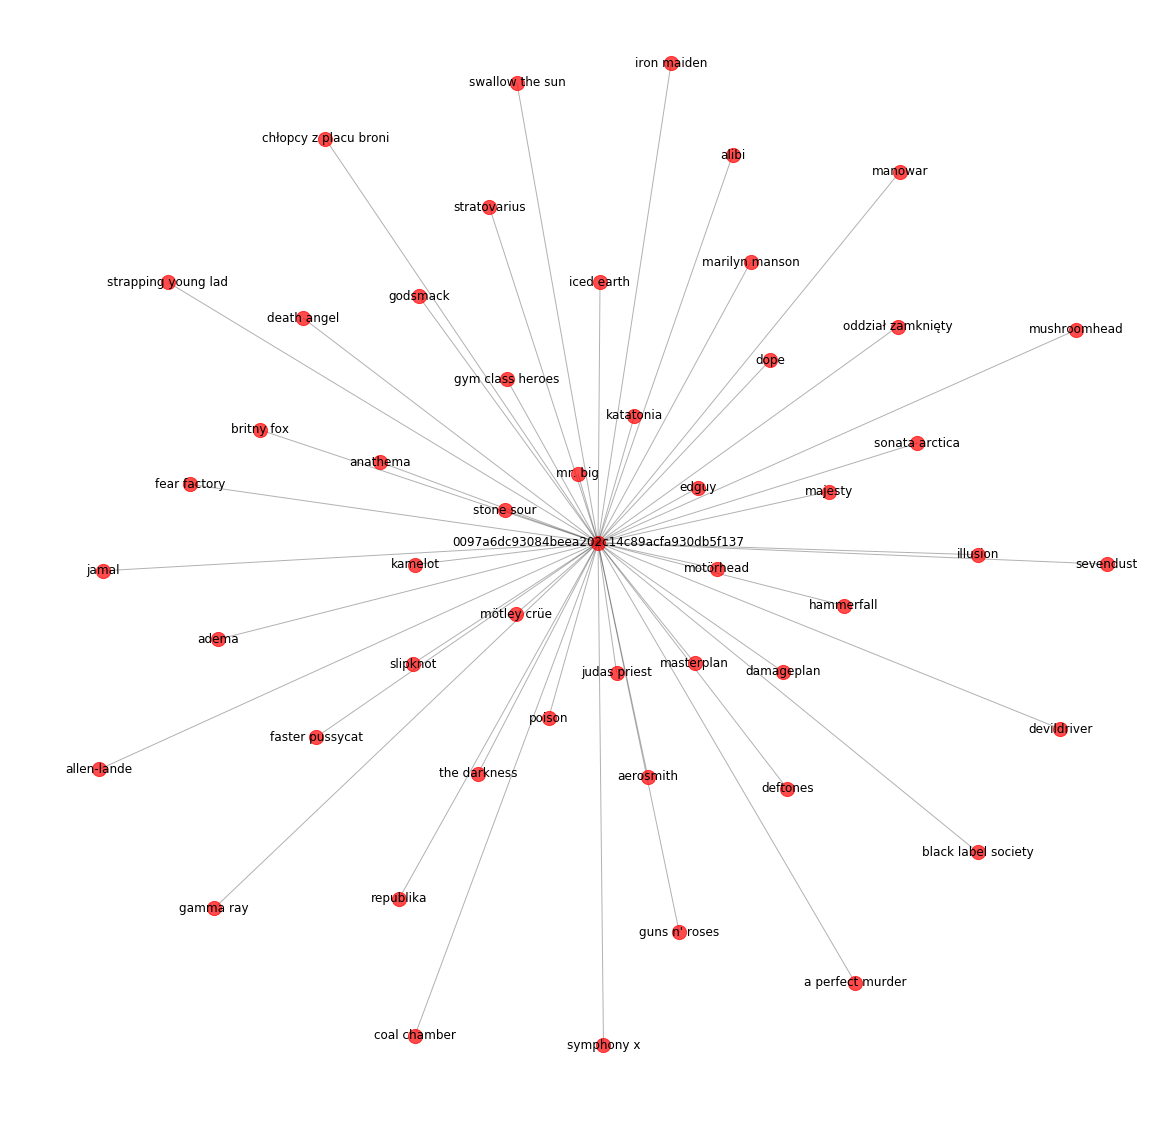

In [4]:
# We will use the simple 1 user data below to demonstrate a visual example of this network
dataPath = os.path.abspath("../data/single-user-sample.tsv")
file=open(dataPath, "rb")
G=nx.readwrite.edgelist.read_weighted_edgelist(file, delimiter='\t', create_using=nx.Graph())
file.close()
# Create a dataset for the labels of the egonet
newLabels = {}
# Loop through each node and set color and label
for label in G.nodes():
    # Set label and color
    newLabels[label] = label
# Set figure values for display
position=nx.spring_layout(G,k=1.0, iterations=20)
plt.figure(1,figsize=(20,20))
plt.axis('off')
nx.draw_networkx_nodes(G,pos=position,node_size=200,nodelist=G.nodes(),alpha=0.7)
nx.draw_networkx_edges(G,pos=position,alpha=0.3)
nx.draw_networkx_labels(G,position,newLabels,font_size=12)
# Plot and save to current directory
plt.savefig("graph.png", dpi=300)

## Our Analysis ##
---
Now that we have a model and a set of data to perform our analysis, we are going to read all of our data to a graph.
We are going to work with each individual focal node and use the set of its alter nodes in the jaccard similarity 
calculation between that focal node and every other focal node in the graph. 

In [5]:
# Reads in sample file with following format:
# [uid] [artist-name] [plays]
# Where user is the focal node of our egonet, artist is the alter, and plays are weight
dataPath = os.path.abspath("../data/user-sample.tsv")
file=open(dataPath, "rb")
G=nx.readwrite.edgelist.read_weighted_edgelist(file, delimiter='\t', create_using=nx.Graph())
file.close()

In [6]:
# Create a dictionary that will read in each user
userDict = dict()
# Read file in line by line
with open(dataPath, 'r') as tsvin:
    curUser = ""
    # We loop through each line in the input
    for line in tsvin:
        lineItems = line.strip('\n').split('\t')
        [uid, artistname, plays] = lineItems
        # Add artist name and number of plays to the user data
        if curUser == "" or curUser != uid:
            curUser = uid
            userDict[curUser] = [[], dict()]
        userDict[curUser][0] = userDict[curUser][0] + [[artistname, int(plays)]]

In [7]:
# Method used to calculate jaccard similarity between two sets
def jaccard(set1, set2):
    # First, calculatethe intersection between the two sets
    intersect = len([item for item in set1 if item in set2])
    # Now, calculate the union between the two sets
    union = len(set(set1 + set2))
    # Finally, calculate the similarity and return
    similarity = float(intersect / union)
    return similarity

# Create a dictionary for the corresponding similarities
sims = dict()

# Loop through and generate Jaccard similarity between each user
for curKey in userDict:
    curUser = userDict[curKey]
    curArtists = [item[0] for item in curUser[0]]
    # First we determine whether or not the value has already been calculated
    for otherKey in userDict:
        # Make sure that the similarity is only stored in the 
        if curKey != otherKey and (curKey,otherKey) not in sims and (otherKey,curKey) not in sims:
            otherUser = userDict[otherKey]
            otherArtists = [item[0] for item in otherUser[0]]
            # Create key for similarities
            key = (curKey, otherKey)
            # Store in similarities
            sims[key] = jaccard(curArtists, otherArtists)

## Our Results ##
---
Now that we have all the similarity values calculated, we can output the data so that it can be analyzed. In 
our example, we are going to calculate the maximum similarity between two nodes, the minimum similarity between
two nodes, and the average similarity. 

In [8]:
# Now that we have the values calculated, we are going to display the results in a table
data_table = pd.DataFrame({"$Similarities":list(sims.keys()),"$User's":list(sims.values())})
data_table.columns = ["User's", "Similarities"]
# Store as excel file
writer = pd.ExcelWriter('similarities.xlsx', engine='xlsxwriter')
data_table.to_excel(writer, sheet_name='Sheet1')
writer.save()
# Output to display
data_table


User's  Similarities
0      (0097a6dc93084beea202c14c89acfa930db5f137, 00c...      0.009804
1      (0097a6dc93084beea202c14c89acfa930db5f137, 021...      0.036145
2      (0097a6dc93084beea202c14c89acfa930db5f137, 033...      0.000000
3      (0097a6dc93084beea202c14c89acfa930db5f137, 037...      0.000000
4      (0097a6dc93084beea202c14c89acfa930db5f137, 04a...      0.000000
5      (0097a6dc93084beea202c14c89acfa930db5f137, 04a...      0.000000
6      (0097a6dc93084beea202c14c89acfa930db5f137, 057...      0.000000
7      (0097a6dc93084beea202c14c89acfa930db5f137, 057...      0.010638
8      (0097a6dc93084beea202c14c89acfa930db5f137, 064...      0.000000
9      (0097a6dc93084beea202c14c89acfa930db5f137, 067...      0.000000
10     (0097a6dc93084beea202c14c89acfa930db5f137, 06b...      0.010309
11     (0097a6dc93084beea202c14c89acfa930db5f137, 06c...      0.000000
12     (0097a6dc93084beea202c14c89acfa930db5f137, 07c...      0.019802
13     (0097a6dc93084beea202c14c89acfa930db5f137, 080...      0.010417
14     (0097a6dc93084beea202c14c89acfa930db5f137, 085...      0.000000
15     (0097a6dc93084beea202c14c89acfa930db5f137, 08d...      0.000000
16     (0097a6dc93084beea202c14c89acfa930db5f137, 098...      0.000000
17     (0097a6dc93084beea202c14c89acfa930db5f137, 0a7...      0.000000
18     (0097a6dc93084beea202c14c89acfa930db5f137, 0a9...      0.000000
19     (0097a6dc93084beea202c14c89acfa930db5f137, 0ad...      0.000000
20     (0097a6dc93084beea202c14c89acfa930db5f137, 0b1...      0.000000
21     (0097a6dc93084beea202c14c89acfa930db5f137, 0b7...      0.010309
22     (0097a6dc93084beea202c14c89acfa930db5f137, 0b8...      0.009615
23     (0097a6dc93084beea202c14c89acfa930db5f137, 0c3...      0.000000
24     (0097a6dc93084beea202c14c89acfa930db5f137, 0cf...      0.021505
25     (0097a6dc93084beea202c14c89acfa930db5f137, 0d4...      0.000000
26     (0097a6dc93084beea202c14c89acfa930db5f137, 0e0...      0.000000
27     (0097a6dc93084beea202c14c89acfa930db5f137, 0e3...      0.000000
28     (0097a6dc93084beea202c14c89acfa930db5f137, 0e9...      0.000000
29     (0097a6dc93084beea202c14c89acfa930db5f137, 0ef...      0.000000
...                                                  ...           ...
64231  (fa5de57604107323ede17d96c7f4e65bcc616290, fcc...      0.000000
64232  (fa5de57604107323ede17d96c7f4e65bcc616290, fd4...      0.007519
64233  (fa69001c6ef7a99985188f9808634bd5609c3167, fb6...      0.000000
64234  (fa69001c6ef7a99985188f9808634bd5609c3167, fbc...      0.000000
64235  (fa69001c6ef7a99985188f9808634bd5609c3167, fbe...      0.019608
64236  (fa69001c6ef7a99985188f9808634bd5609c3167, fbe...      0.039216
64237  (fa69001c6ef7a99985188f9808634bd5609c3167, fc1...      0.040000
64238  (fa69001c6ef7a99985188f9808634bd5609c3167, fcc...      0.009709
64239  (fa69001c6ef7a99985188f9808634bd5609c3167, fd4...      0.032258
64240  (fb6ba841d7890f8fce7b6168d16d232fc88a9b5a, fbc...      0.000000
64241  (fb6ba841d7890f8fce7b6168d16d232fc88a9b5a, fbe...      0.000000
64242  (fb6ba841d7890f8fce7b6168d16d232fc88a9b5a, fbe...      0.011765
64243  (fb6ba841d7890f8fce7b6168d16d232fc88a9b5a, fc1...      0.000000
64244  (fb6ba841d7890f8fce7b6168d16d232fc88a9b5a, fcc...      0.000000
64245  (fb6ba841d7890f8fce7b6168d16d232fc88a9b5a, fd4...      0.000000
64246  (fbcc4a08125ed169d3bf5bbbc799f76e5c28e0c8, fbe...      0.000000
64247  (fbcc4a08125ed169d3bf5bbbc799f76e5c28e0c8, fbe...      0.000000
64248  (fbcc4a08125ed169d3bf5bbbc799f76e5c28e0c8, fc1...      0.000000
64249  (fbcc4a08125ed169d3bf5bbbc799f76e5c28e0c8, fcc...      0.000000
64250  (fbcc4a08125ed169d3bf5bbbc799f76e5c28e0c8, fd4...      0.010309
64251  (fbe6ba79459cc4f6092d32574bbe993946a7cba5, fbe...      0.053763
64252  (fbe6ba79459cc4f6092d32574bbe993946a7cba5, fc1...      0.010526
64253  (fbe6ba79459cc4f6092d32574bbe993946a7cba5, fcc...      0.000000
64254  (fbe6ba79459cc4f6092d32574bbe993946a7cba5, fd4...      0.034483
64255  (fbe975c1ba58c5bf3ffedee8f6ebc90f043e8a7f, fc1...      0.042553
642

In [9]:
# Now that we have a tale of results of our analysis, we can generate properties on the table

# Calculate max similarity in table
maxKey = max(sims.items(), key=operator.itemgetter(1))[0]
maxValue = sims[maxKey]

# Calculate min similarity in table
minKey = min(sims.items(), key=operator.itemgetter(1))[0]
minValue = sims[minKey]

# Calculate the average similarity in the table
avg = sum(sims.values())/len(sims.values())

# Output these values to the console
print("The pair " + str(maxKey) + " are most similar with jaccard value: " + str(maxValue))
print("The pair " + str(minKey) + " are least similar with jaccard value: " + str(minValue))
print("The average similarity of all users in the sample: " + str(avg))

The pair ('2ac2dbdbe9802c0aca895955972c3fa86b5800ac', '93325fb6e0b4385ae8e5d11c2c3a31e97b841a28') are most similar with jaccard value: 0.20253164556962025
The pair ('0097a6dc93084beea202c14c89acfa930db5f137', '0330b5c30bfcb660edbb4a8415f8a6485815d035') are least similar with jaccard value: 0.0
The average similarity of all users in the sample: 0.01071287332449662


## Final Graph ##
---
To conclude our analysis, we can generate k complete graph where k is the number of nodes in our sample. Each edge
will be weighted according to the similarity between the two nodes. This will provide us with a final visualization of 
similarity between two users.

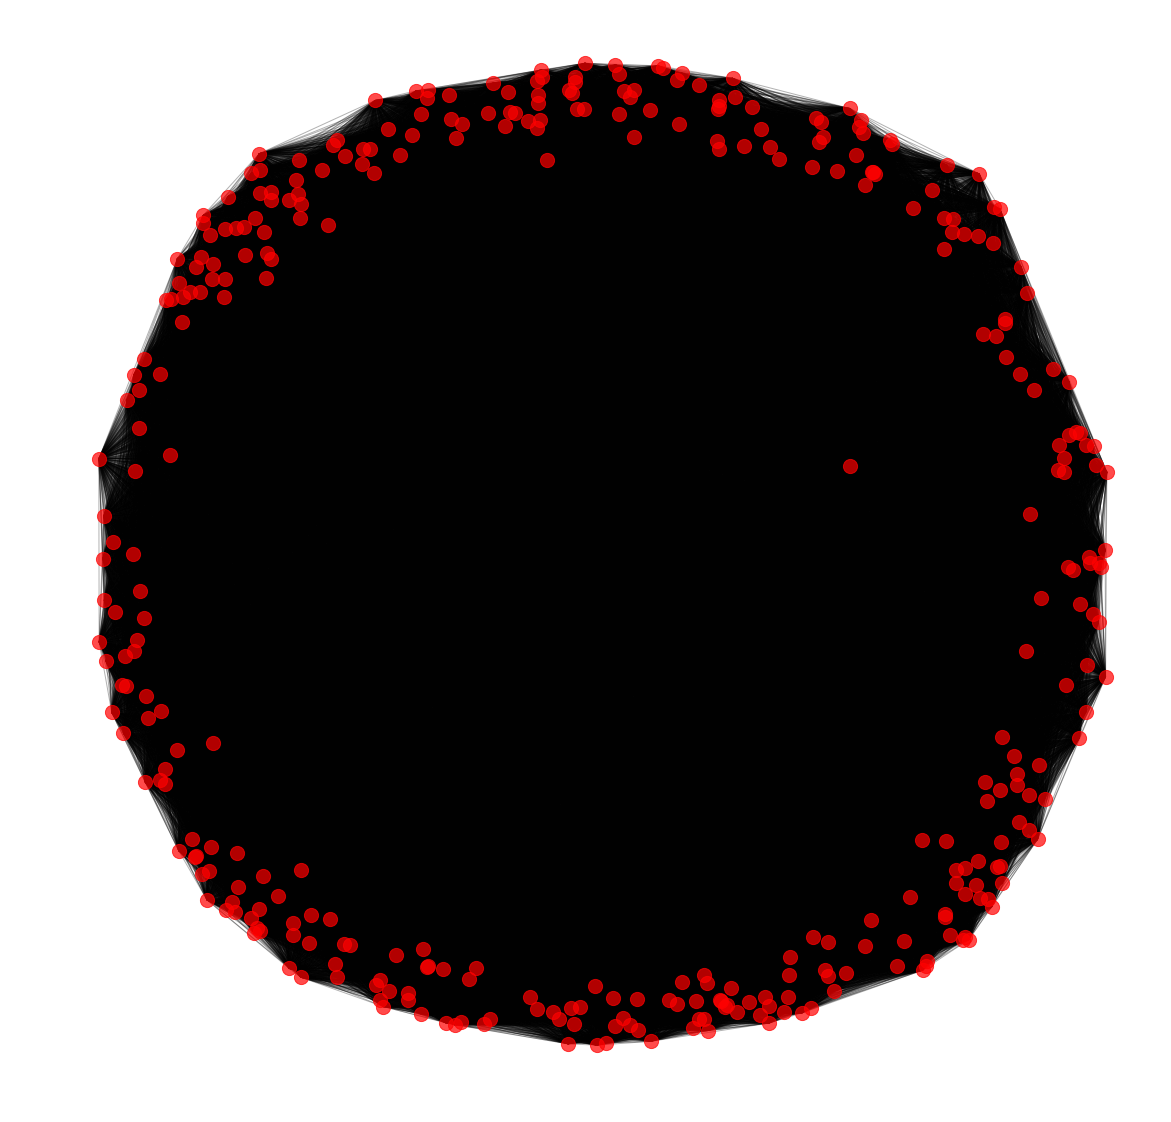

In [11]:
# Create final graph
H = nx.Graph()
# Create nodes in graph
for node in userDict.keys():
    # Add node to graph
    H.add_node(node)
# Create edges in graph
for edge in sims.keys():
    H.add_edge(edge[0],edge[1], weight=((sims[edge])*-1))
# Draw graph
position=nx.spring_layout(H)
plt.figure(1,figsize=(20,20))
plt.axis('off')
nx.draw_networkx_nodes(H,pos=position,node_size=200,nodelist=H.nodes(),alpha=0.7)
nx.draw_networkx_edges(H,pos=position,alpha=0.3)
# Plot and save to current directory
plt.savefig("final_graph.png", dpi=300)